In [1]:
from chart_studio import plotly
import matplotlib.pyplot as plt
import pandas as pd
import time
import seaborn as sns
from sklearn import linear_model
import plotly.offline as pyoff
import plotly.graph_objs as go

df = pd.read_csv('Telco-Customer-Churn.csv')

In [2]:
df.head()

,Unnamed: 0,unnamed: 0,unnamed: 0.1,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,0,0,0,7590-VHVEG,Female,0,Yes,No,1,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,1,1,5575-GNVDE,Male,0,No,No,34,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,2,2,3668-QPYBK,Male,0,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,3,3,7795-CFOCW,Male,0,No,No,45,No,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,4,4,9237-HQITU,Female,0,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Table for all customers with Churn="Yes"

In [3]:
df['churn'].value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [4]:
sub_df = df.loc[df['churn']=='Yes']
sub_df

,Unnamed: 0,unnamed: 0,unnamed: 0.1,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
2,2,2,2,3668-QPYBK,Male,0,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,4,4,4,9237-HQITU,Female,0,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,5,5,5,9305-CDSKC,Female,0,No,No,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,8,8,8,7892-POOKP,Female,0,Yes,No,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,13,13,13,0280-XJGEX,Male,0,No,No,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,7021,7021,7021,1699-HPSBG,Male,0,No,No,12,Yes,...,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,7026,7026,7026,8775-CEBBJ,Female,0,No,No,9,Yes,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,7032,7032,7032,6894-LFHLY,Male,1,No,No,1,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,7034,7034,7034,0639-TSIQW,Female,0,No,No,67,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [5]:
yeschurn = df.loc[df['churn'] == 'Yes']
nochurn = df.loc[df['churn'] == 'No']

# Distribution of Gender between Yes and No Churn

In [6]:
yeschurn.gender.value_counts().reset_index().rename(columns={'index': 'Gender', 0: 'count'})

,Gender,gender
0,Female,939
1,Male,930


In [7]:
nochurn.gender.value_counts().reset_index().rename(columns={'index': 'Gender', 0: 'count'})

,Gender,gender
0,Male,2625
1,Female,2549


# Distribution of Senior Citizen between Yes and No Churn

In [8]:
yeschurn.gender.value_counts().reset_index().rename(columns={'index': 'Gender', 0: 'count'})

,Gender,gender
0,Female,939
1,Male,930


In [9]:
nochurn.gender.value_counts().reset_index().rename(columns={'index': 'Gender', 0: 'count'})

,Gender,gender
0,Male,2625
1,Female,2549


# Distribution of Partner between Yes and No Churn

In [10]:
yeschurn.partner.value_counts().reset_index().rename(columns={'index': 'Partner', 0: 'count'})

,Partner,partner
0,No,1200
1,Yes,669


In [11]:
nochurn.partner.value_counts().reset_index().rename(columns={'index': 'Partner', 0: 'count'})

,Partner,partner
0,Yes,2733
1,No,2441


# Distribution of Dependents between Yes and No Churn

In [12]:
yeschurn.dependents.value_counts().reset_index().rename(columns={'index': 'Dependents', 0: 'count'})

,Dependents,dependents
0,No,1543
1,Yes,326


In [13]:
nochurn.dependents.value_counts().reset_index().rename(columns={'index': 'Dependents', 0: 'count'})

,Dependents,dependents
0,No,3390
1,Yes,1784


# Distribution of Tenure between Yes and No Churn

In [14]:
yeschurn.tenure.value_counts().reset_index().rename(columns={'index': 'tenure', 0: 'count'})

,tenure,tenure
0,1,380
1,2,123
2,3,94
3,4,83
4,5,64
...,...,...
67,60,6
68,72,6
69,62,5
70,64,4


In [15]:
nochurn.tenure.value_counts().reset_index().rename(columns={'index': 'tenure', 0: 'count'})

,tenure,tenure
0,72,356
1,1,233
2,71,164
3,2,115
4,70,108
...,...,...
68,44,45
69,28,45
70,39,42
71,36,40


# Distribution of Phone Service between Yes and No Churn

In [16]:
yeschurn.phoneservice.value_counts().reset_index().rename(columns={'index': 'PhoneService', 0: 'count'})

,PhoneService,phoneservice
0,Yes,1699
1,No,170


In [17]:
nochurn.phoneservice.value_counts().reset_index().rename(columns={'index': 'PhoneService', 0: 'count'})

,PhoneService,phoneservice
0,Yes,4662
1,No,512


# Distribution of MultipleLines between Yes and No Churn

In [18]:
yeschurn.multiplelines.value_counts().reset_index().rename(columns={'index': 'MultipleLines', 0: 'count'})

,MultipleLines,multiplelines
0,Yes,850
1,No,849
2,No phone service,170


In [19]:
nochurn.multiplelines.value_counts().reset_index().rename(columns={'index': 'MultipleLines', 0: 'count'})

,MultipleLines,multiplelines
0,No,2541
1,Yes,2121
2,No phone service,512


# Distribution of Internet Service between Yes and No Churn

In [20]:
yeschurn.internetservice.value_counts().reset_index().rename(columns={'index': 'InternetService', 0: 'count'})

,InternetService,internetservice
0,Fiber optic,1297
1,DSL,459
2,No,113


In [21]:
nochurn.internetservice.value_counts().reset_index().rename(columns={'index': 'InternetService', 0: 'count'})

,InternetService,internetservice
0,DSL,1962
1,Fiber optic,1799
2,No,1413


# Distribution of Online Security between Yes and No Churn

In [22]:
yeschurn.onlinesecurity.value_counts().reset_index().rename(columns={'index': 'OnlineSecurity', 0: 'count'})

,OnlineSecurity,onlinesecurity
0,No,1461
1,Yes,295
2,No internet service,113


In [23]:
nochurn.onlinesecurity.value_counts().reset_index().rename(columns={'index': 'OnlineSecurity', 0: 'count'})

,OnlineSecurity,onlinesecurity
0,No,2037
1,Yes,1724
2,No internet service,1413


# Distribution of Online Backup between Yes and No Churn

In [24]:
yeschurn.onlinebackup.value_counts().reset_index().rename(columns={'index': 'OnlineBackup', 0: 'count'})

,OnlineBackup,onlinebackup
0,No,1233
1,Yes,523
2,No internet service,113


In [25]:
nochurn.onlinebackup.value_counts().reset_index().rename(columns={'index': 'OnlineBackup', 0: 'count'})

,OnlineBackup,onlinebackup
0,Yes,1906
1,No,1855
2,No internet service,1413


# Distribution of Device Protection between Yes and No Churn

In [26]:
yeschurn.deviceprotection.value_counts().reset_index().rename(columns={'index': 'DeviceProtection', 0: 'count'})

,DeviceProtection,deviceprotection
0,No,1211
1,Yes,545
2,No internet service,113


In [27]:
nochurn.deviceprotection.value_counts().reset_index().rename(columns={'index': 'DeviceProtection', 0: 'count'})

,DeviceProtection,deviceprotection
0,No,1884
1,Yes,1877
2,No internet service,1413


# Distribution of Tech Support  between Yes and No Churn

In [28]:
yeschurn.techsupport.value_counts().reset_index().rename(columns={'index': 'TechSupport', 0: 'count'})

,TechSupport,techsupport
0,No,1446
1,Yes,310
2,No internet service,113


In [29]:
nochurn.techsupport.value_counts().reset_index().rename(columns={'index': 'TechSupport', 0: 'count'})

,TechSupport,techsupport
0,No,2027
1,Yes,1734
2,No internet service,1413


# Distribution of Streaming Movies  between Yes and No Churn

In [30]:
yeschurn.streamingmovies.value_counts().reset_index().rename(columns={'index': 'StreamingMovies', 0: 'count'})

,StreamingMovies,streamingmovies
0,No,938
1,Yes,818
2,No internet service,113


In [31]:
nochurn.streamingmovies.value_counts().reset_index().rename(columns={'index': 'StreamingMovies', 0: 'count'})

,StreamingMovies,streamingmovies
0,Yes,1914
1,No,1847
2,No internet service,1413


# Distribution of Contract between Yes and No Churn

In [32]:
yeschurn.contract.value_counts().reset_index().rename(columns={'index': ' Contract', 0: 'count'})

,Contract,contract
0,Month-to-month,1655
1,One year,166
2,Two year,48


In [33]:
nochurn.contract.value_counts().reset_index().rename(columns={'index': ' Contract', 0: 'count'})

,Contract,contract
0,Month-to-month,2220
1,Two year,1647
2,One year,1307


# Distribution of Paperless Billing between Yes and No Churn

In [34]:
yeschurn.paperlessbilling.value_counts().reset_index().rename(columns={'index': ' PaperlessBilling', 0: 'count'})

,PaperlessBilling,paperlessbilling
0,Yes,1400
1,No,469


In [35]:
nochurn.paperlessbilling.value_counts().reset_index().rename(columns={'index': ' PaperlessBilling', 0: 'count'})

,PaperlessBilling,paperlessbilling
0,Yes,2771
1,No,2403


# Distribution of Payment Method between Yes and No Churn

In [36]:
yeschurn.paymentmethod.value_counts().reset_index().rename(columns={'index': ' PaymentMethod', 0: 'count'})

,PaymentMethod,paymentmethod
0,Electronic check,1071
1,Mailed check,308
2,Bank transfer (automatic),258
3,Credit card (automatic),232


In [37]:
nochurn.paymentmethod.value_counts().reset_index().rename(columns={'index': ' PaymentMethod', 0: 'count'})

,PaymentMethod,paymentmethod
0,Mailed check,1304
1,Electronic check,1294
2,Credit card (automatic),1290
3,Bank transfer (automatic),1286


# Distribution of Monthly Charges between Yes and No Churn

In [38]:
yeschurn.monthlycharges.value_counts().reset_index().rename(columns={'index': 'MonthlyCharges', 0: 'count'})

,MonthlyCharges,monthlycharges
0,74.40,13
1,74.90,9
2,74.95,8
3,45.30,8
4,70.15,7
...,...,...
905,29.50,1
906,24.60,1
907,68.25,1
908,87.45,1


In [39]:
nochurn.monthlycharges.value_counts().reset_index().rename(columns={'index': 'MonthlyCharges', 0: 'count'})

,MonthlyCharges,monthlycharges
0,20.05,58
1,19.70,41
2,19.95,41
3,19.85,40
4,19.90,40
...,...,...
1455,68.35,1
1456,107.65,1
1457,84.55,1
1458,26.90,1


# Distribution of Total Charges between Yes and No Churn

In [40]:
yeschurn.totalcharges.value_counts().reset_index().rename(columns={'index': 'TotalCharges', 0: 'count'})

,TotalCharges,totalcharges
0,20.20,6
1,45.30,5
2,69.65,4
3,20.15,4
4,19.90,4
...,...,...
1727,1445.30,1
1728,141.45,1
1729,512.45,1
1730,777.30,1


In [41]:
nochurn.totalcharges.value_counts().reset_index().rename(columns={'index': 'TotalCharges', 0: 'count'})

,TotalCharges,totalcharges
0,0.00,11
1,19.75,7
2,20.05,6
3,19.55,6
4,19.65,6
...,...,...
4961,2117.20,1
4962,203.95,1
4963,6849.40,1
4964,85.50,1


# Histogram for the distribution of customers based on Churn = "Yes" and Churn = "No"

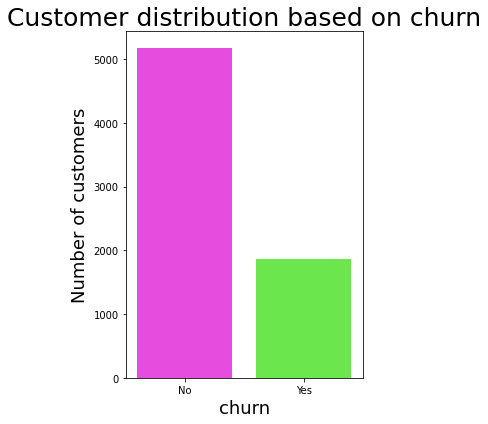

In [42]:
fig1 = plt.figure(figsize = (12,6))
plt.subplot(132)
churn = sns.countplot(x = df['churn'], palette = ['#FF33F5', '#5CFF33'])
churn.set_title('Customer distribution based on churn', fontsize = 25, fontweight = 'normal')
churn.set_xlabel('churn', fontweight = 'normal', fontsize = 18)
churn.set_ylabel('Number of customers', fontweight = 'normal', fontsize = 18)
plt.tight_layout()
plt.show()

# Histogram for Churn depending on the contract length

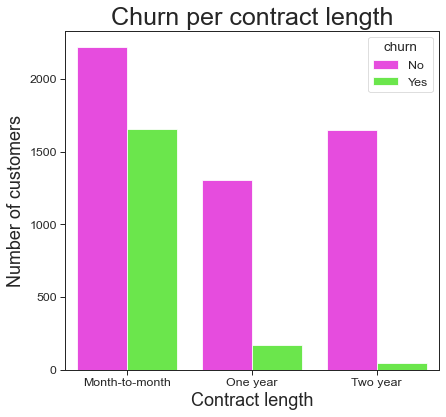

In [43]:
df.columns = map(str.lower, df.columns)
df.totalcharges = df.totalcharges.replace(" ", 0)
df.totalcharges = df.totalcharges.astype('float32')
df.to_csv('Telco-Customer-Churn.csv')
#Code to make the histogram
sns.set(style = 'ticks')
sns.set_context('paper', font_scale = 1.4)
fig = plt.figure(figsize = (18,6))
plt.subplot(132)
contract = sns.countplot(data = df, x = 'contract', hue = 'churn', palette = ['#FF33F5', '#5CFF33'])
contract.set_title('Churn per contract length', fontsize = 25, fontweight = 'normal')
contract.set_xlabel('Contract length', fontweight = 'normal', fontsize = 18)
contract.set_ylabel('Number of customers', fontweight = 'normal', fontsize = 18)
plt.tight_layout()
plt.show()

From this graph we can see that where there is the most amount of churn, is for the customers that have month to month subscriptions. Now, I will compare which category alongside contract length has the most amount of Churn = "Yes".

